## Imports

In [1]:
# ONLY USE THESE IMPORTS.
import numpy as np
import matplotlib.pyplot as plt

## Read Data

In [2]:
#import os
#os.getcwd()
# Read Training Images, Testing Images, Training Labels, Testing Labels
# Use Assignment 0 for reference.
train = np.array([plt.imread('Data/Train/'+str(i)+'.jpg').reshape(-1) for i in range (1,2401)])
test = np.array([plt.imread('Data/Test/'+str(i)+'.jpg').reshape(-1) for i in range (1,201)])
train_labels = np.loadtxt('Data/Train/Training Labels.txt')
test_labels = np.loadtxt('Data/Test/Test Labels.txt')
#print(train[5])
#print(train[6])
print(train.shape, test.shape)
print(train_labels.shape,test_labels.shape)

(2400, 784) (200, 784)
(2400,) (200,)


## Compute weight vectors

### Zero class: (this is a trial cell for me, just to get the main points of the process for a one class only (zero) in order to be applied in a loop for all classes in the next cell. It is optional to run this cell)

In [3]:
#cols: pixels, rows:images
#get zeros only:
train_zero = train[:240]
#get the transpose in order to calculate the mean of each pixel(to be rows) across all images (columns)
train_zero = train_zero.T
#train_zero
#print(train[:,:5])
#create image of length 784 each index, represents the mean of the correspoding pixel in all images
mean_image = np.zeros(len(train_zero))
#calculate mean:
for index,i in enumerate(train_zero):
    for j in i:
        mean_image[index] += j
    mean_image[index] /= len(i)
    
#The mean image (mean of each pixel in all images creating new mean image) of zero train data
print(mean_image.shape)
#return train_zero as it was
train_zero = train_zero.T

######################################################
# the rest of images (zero images exclusive)
train_zero_exc = train[240:]
train_zero_exc = train_zero_exc.T
mean_image_z_exc = np.zeros(len(train_zero_exc))
#calculate mean:
for index,i in enumerate(train_zero_exc):
    for j in i:
        mean_image_z_exc[index] += j
    mean_image_z_exc[index] /= len(i)
    
#The mean image (mean of each pixel in all images creating new mean image) of zero exclusive train data
#print(train_zero_exc.shape)
print(mean_image_z_exc.shape)

######################################################
#### Calculate S_w (scatter matrix) for zero
#print(train_zero.shape)
S_w_zero = 0

for i in train_zero:
    S_w_zero += (i-mean_image).reshape(784,1) @ (i-mean_image).reshape(1,784)
    
print(S_w_zero.shape)

#other classes:
S_w_zero_exc = 0
train_zero_exc = train_zero_exc.T
for i in train_zero_exc:
    S_w_zero_exc += (i-mean_image_z_exc).reshape(784,1) @ (i-mean_image_z_exc).reshape(1,784)
    
print(S_w_zero_exc.shape)

######################################################
#S_w inverse:
S_w_zero_inv = np.linalg.pinv(S_w_zero+S_w_zero_exc)
S_w_zero_inv.shape


(784,)
(784,)
(784, 784)
(784, 784)


(784, 784)

## weights of 10 classes:

In [4]:
##index of which data will be considered as the current class
start_index_inclusive = 0
end_index_inclusive = 240
##indexes of which data will be considered as not the current class
end_index_exclusive_1 = 0
start_index_exclusive_2 = 240
total_weights = np.random.choice([-1, 0, 1], size=(784,1))
w0=w1=w2=w3=w4=w5=w6=w7=w8=w9 = 0
midway0=midway1=midway2=midway3=midway4=midway5=midway6=midway7=midway8=midway9 = 0

for counter in range(0,10):
    train_inclusive = train[start_index_inclusive:end_index_inclusive]
    train_inclusive = train_inclusive.T
    mean_image = np.zeros(len(train_inclusive))
    #calculate mean:
    for index,i in enumerate(train_inclusive):
        for j in i:
            mean_image[index] += j
        mean_image[index] /= len(i)
    #print(mean_image.shape)
    train_inclusive = train_inclusive.T

    # the rest of images (one images exclusive)
    train_exclusive = np.concatenate((train[:end_index_exclusive_1], train[start_index_exclusive_2:]), axis=0)
    train_exclusive = train_exclusive.T
    mean_image_exc = np.zeros(len(train_exclusive))
    #calculate mean:
    for index,i in enumerate(train_exclusive):
        for j in i:
            mean_image_exc[index] += j
        mean_image_exc[index] /= len(i)
    #print(mean_image_exc.shape)


    ##S_w:
    S_w_inc = 0
    for i in train_inclusive:
        S_w_inc += (i-mean_image).reshape(784,1) @ (i-mean_image).reshape(1,784)
    #print(S_w_inc.shape)

    #other classes:
    S_w_exc = 0
    train_exclusive = train_exclusive.T
    for i in train_exclusive:
        S_w_exc += (i-mean_image_exc).reshape(784,1) @ (i-mean_image_exc).reshape(1,784)
    #print(S_w_exc.shape)

    #####################################
    #S_w inverse:
    S_w_inv = np.linalg.pinv(S_w_inc+S_w_exc)
    S_w_inv.shape
    
    #weight of class:
    w = S_w_inv @ (mean_image - mean_image_exc).reshape(784,1)
    midway = (mean_image + mean_image_exc)/2
    if counter == 0:
        w0 = w
        midway0 = midway
    elif counter == 1:
        w1 = w
        midway1 = midway
        ###################
    elif counter == 2:
        w2 = w
        midway2 = midway
        ################
    elif counter == 3:
        w3 = w
        midway3 = midway
        #############
    elif counter == 4:
        w4 = w
        midway4 = midway
        ##########
    elif counter == 5:
        w5 = w
        midway5 = midway
        #######
    elif counter == 6:
        w6 = w
        midway6 = midway
        #####
    elif counter == 7:
        w7 = w
        midway7 = midway
        ####
    elif counter == 8:
        w8 = w
        midway8 = midway
        ##
    elif counter == 9:
        w9 = w
        midway9 = midway
    #np.concatenate((total_weights, w), axis=0)
    #print(w)
    
    ##update indecies for next iteration class:
    start_index_inclusive += 240
    end_index_inclusive += 240
    end_index_exclusive_1 = start_index_exclusive_2
    start_index_exclusive_2 += 240
    
#print(w0)
print("Done")

Done


In [5]:
#Optional run (Checking scores):checking the weights results with one correct test image and other incorrect image:
print('correct', '      incorrect')
print(test[1] @ w0, test[21] @ w0)

print(test[25] @ w1, test[1] @ w1)

print(test[105] @ w5, test[85] @ w5)

#print(w0.reshape(1,784))
#print(w0)
#print(test[0].shape, w0.shape)

correct       incorrect
[0.01241118] [-0.00449501]
[0.01432001] [-0.00598026]
[0.00678768] [-0.00477583]


In [6]:
w = w0
#print(w0[-1])
#print(w1[-1])
#print(w0.shape)
w = np.concatenate((w,w1,w2,w3,w4,w5,w6,w7,w8,w9),axis=1)
w.shape

(784, 10)

## Compute confusion matrix

In [7]:
# Please return a variable named confusion_matrix so the next cell would work.
results = test @ w
confusion_matrix = np.zeros((10,10))
start_index = 0
end_index = 20
for i in range(10):
    current_results = results[start_index:end_index]

    for image_results in current_results:
        index_of_max = np.argmax(image_results, axis=0)
        confusion_matrix[i][index_of_max] += 1
    start_index += 20
    end_index += 20
confusion_matrix

array([[19.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0., 20.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  2., 12.,  2.,  2.,  1.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0., 18.,  0.,  0.,  0.,  0.,  2.,  0.],
       [ 0.,  0.,  0.,  1., 10.,  1.,  3.,  0.,  3.,  2.],
       [ 0.,  0.,  0.,  2.,  0., 11.,  1.,  0.,  4.,  2.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 20.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  1.,  0.,  0.,  0., 16.,  0.,  2.],
       [ 0.,  0.,  0.,  1.,  0.,  1.,  0.,  0., 18.,  0.],
       [ 1.,  0.,  0.,  3.,  1.,  0.,  0.,  5.,  0., 10.]])

## Plot confusion matrix and print accuracy

Overall accuracy:  0.77


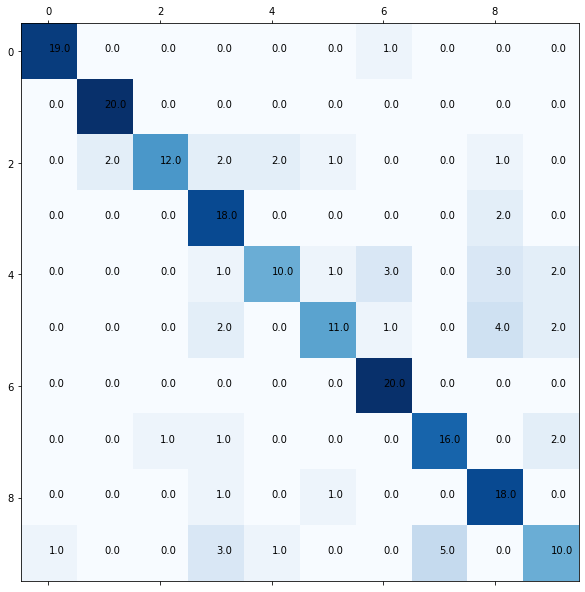

In [8]:
# Plot Confusion Matrix
plt.rc('figure', figsize=[20,10])
plt.matshow(confusion_matrix,cmap='Blues')
for i in range(0,confusion_matrix.shape[0]):
    for j in range(0,confusion_matrix.shape[1]):
        plt.annotate(confusion_matrix[i,j],(j,i))

# Calculate Accuracy
print("Overall accuracy: ",(np.sum(np.diag(confusion_matrix)))/test.shape[0])

## Compute bias node for each classifier

In [15]:
w_node0 = -1 * (w0.T @ midway0)
w_node1 = -1 * (w1.T @ midway1)
w_node2 = -1 * (w2.T @ midway2)
w_node3 = -1 * (w3.T @ midway3)
w_node4 = -1 * (w4.T @ midway4)
w_node5 = -1 * (w5.T @ midway5)
w_node6 = -1 * (w6.T @ midway6)
w_node7 = -1 * (w7.T @ midway7)
w_node8 = -1 * (w8.T @ midway8)
w_node9 = -1 * (w9.T @ midway9)
w_node0

array([-0.00619621])

## Compute confusion matrix

In [13]:
# Please return a variable named confusion_matrix so the next cell would work.
results = test @ w
#print(results.shape)
summation_class_zero = np.sum(results[:20], axis = 0)    #shape is (1*10)
for i in results:
    for j in range(10):
        if j == 0:
            i[j] += w_node0
        elif j == 1:
            i[j] += w_node1
        elif j == 2:
            i[j] += w_node2
        elif j == 3:
            i[j] += w_node3
        elif j == 4:
            i[j] += w_node4
        elif j == 5:
            i[j] += w_node5
        elif j == 6:
            i[j] += w_node6
        elif j == 7:
            i[j] += w_node7
        elif j == 8:
            i[j] += w_node8
        elif j == 9:
            i[j] += w_node9

#counting:
confusion_matrix = np.zeros((10,10))
start_index = 0
end_index = 20
for i in range(10):
    current_results = results[start_index:end_index]

    for image_results in current_results:
        index_of_max = np.argmax(image_results, axis=0)
        confusion_matrix[i][index_of_max] += 1
    start_index += 20
    end_index += 20
confusion_matrix

array([[19.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0., 20.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  3., 11.,  2.,  2.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 17.,  0.,  1.,  0.,  0.,  2.,  0.],
       [ 0.,  0.,  0.,  0., 17.,  1.,  0.,  0.,  1.,  1.],
       [ 0.,  0.,  0.,  1.,  0., 14.,  1.,  0.,  2.,  2.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 20.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  1.,  0.,  0.,  0., 15.,  0.,  3.],
       [ 0.,  0.,  1.,  0.,  0.,  3.,  0.,  0., 15.,  1.],
       [ 1.,  0.,  0.,  1.,  1.,  1.,  0.,  3.,  0., 13.]])

## Plot confusion matrix and print accuracy

Overall accuracy:  0.805


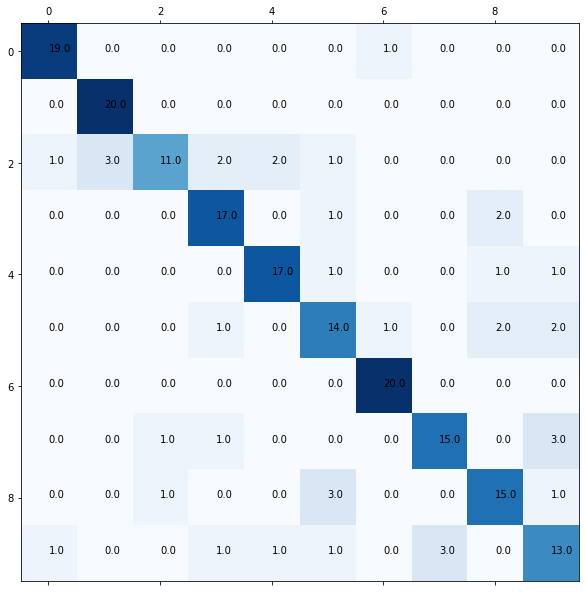

In [14]:
# Plot Confusion Matrix
plt.rc('figure', figsize=[20,10])
plt.matshow(confusion_matrix,cmap='Blues')
for i in range(0,confusion_matrix.shape[0]):
    for j in range(0,confusion_matrix.shape[1]):
        plt.annotate(confusion_matrix[i,j],(j,i))
        
# Calculate Accuracy
print("Overall accuracy: ",(np.sum(np.diag(confusion_matrix)))/test.shape[0])

###                                                      Thank You :D